# *CRIME PREDICTION MODELS*

In [1]:
#Mounting of drive to access relevant files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing libraries for EDA and preprocessing
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Reading Crime Data File of the crimes of January 2021
df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/ODL/Assignment_ODL/Crimes-Jan-2021-data.csv')


# **TABLE OF CONTENT**

**Pre-processing**
1. Importing libraries
2. Importing dataset
3. Handling missing data

**Exploratory Data Analysis**

**Model Construction**
1. Handling categorical data
2. Drop Columns
3. Columns Encoding
2. Splitting dataset into training and testing dataset
3. Feature scaling





# **PRE-PROCESSING**


In [3]:
#datatypes to see types of data
df.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
year                      int64
month                     int64
day                       int64
time                     object
dtype: object

In [4]:
#to view columns and rows
df.shape

(19801, 27)

In [5]:
#view first 5 records
df.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,year,month,day,time
0,0,12016034,JD193556,1/1/2020 0:00,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,...,1912391.0,2020,03/26/2020 03:45:12 PM,41.915306,-87.686639,"(41.915306069, -87.686639247)",2020,1,1,00:00:00
1,1,12220321,JD430436,1/1/2020 0:00,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,...,1844395.0,2020,12/19/2020 03:45:59 PM,41.728192,-87.600985,"(41.728192429, -87.600985433)",2020,1,1,00:00:00
2,2,12013828,JD191019,1/1/2020 0:00,044XX S LAVERGNE AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,...,1874726.0,2020,03/28/2020 03:47:02 PM,41.812274,-87.748177,"(41.81227369, -87.748176594)",2020,1,1,00:00:00
3,3,12019692,JD197444,1/1/2020 0:00,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,...,1921507.0,2020,4/1/2020 15:50,41.940222,-87.669039,"(41.940221932, -87.669039008)",2020,1,1,00:00:00
4,4,12036792,JD216459,1/1/2020 0:00,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,...,1856526.0,2020,04/29/2020 03:53:17 PM,41.762067,-87.699077,"(41.762066981, -87.699077348)",2020,1,1,00:00:00


In [6]:
#view last 5 records
df.tail(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,year,month,day,time
19796,19796,11968231,JD135815,01/31/2020 11:48:00 PM,040XX S SACRAMENTO AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,...,1877747.0,2020,2/7/2020 15:52,41.820306,-87.699516,"(41.820305963, -87.699515522)",2020,1,31,23:48:00
19797,19797,11968265,JD135827,01/31/2020 11:49:00 PM,012XX E 87TH ST,3730,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING JUSTICE,STREET,True,...,1847553.0,2020,2/7/2020 15:52,41.736810,-87.593325,"(41.736809882, -87.59332523)",2020,1,31,23:49:00
19798,19798,11968303,JD135797,01/31/2020 11:50:00 PM,049XX W WELLINGTON AVE,496,BATTERY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,VEHICLE NON-COMMERCIAL,False,...,1919496.0,2020,2/7/2020 15:52,41.935142,-87.749808,"(41.935142198, -87.749807563)",2020,1,31,23:50:00
19799,19799,11968986,JD136093,01/31/2020 11:50:00 PM,033XX N Halsted St,890,THEFT,FROM BUILDING,BAR OR TAVERN,False,...,1922582.0,2020,2/7/2020 15:52,41.943056,-87.649363,"(41.943056436, -87.649362967)",2020,1,31,23:50:00
19800,19800,11968238,JD135805,01/31/2020 11:55:00 PM,098XX S AVENUE H,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,1840552.0,2020,2/7/2020 15:52,41.717192,-87.532869,"(41.717191712, -87.532868868)",2020,1,31,23:55:00


In [7]:
#dataset summary - can be used to replace missing values and clean data
df.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,year,month,day
count,19801.000000,1.980100e+04,19801.000000,19801.000000,19801.000000,19801.000000,1.965200e+04,1.965200e+04,19801.0,19652.000000,19652.000000,19801.0,19801.0,19801.000000
mean,9900.000000,1.193715e+07,1140.326448,11.173729,23.341346,36.905055,1.164962e+06,1.886102e+06,2020.0,41.843053,-87.670165,2020.0,1.0,15.799758
std,5716.200676,5.093355e+05,694.238255,6.935818,13.892011,21.563978,1.616986e+04,3.136727e+04,0.0,0.086260,0.058867,0.0,0.0,9.173730
min,0.000000,2.488900e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.814512e+06,2020.0,41.645796,-87.934567,2020.0,1.0,1.000000
25%,4950.000000,1.194704e+07,611.000000,6.000000,10.000000,23.000000,1.153286e+06,1.858727e+06,2020.0,41.767748,-87.712522,2020.0,1.0,8.000000
50%,9900.000000,1.195508e+07,1023.000000,10.000000,24.000000,32.000000,1.166775e+06,1.892864e+06,2020.0,41.861834,-87.663594,2020.0,1.0,16.000000
75%,14850.000000,1.196305e+07,1713.000000,17.000000,34.000000,54.000000,1.176447e+06,1.908580e+06,2020.0,41.904659,-87.627845,2020.0,1.0,24.000000
max,19800.000000,1.237339e+07,2535.000000,31.000000,50.000000,77.000000,1.204801e+06,1.951493e+06,2020.0,42.022548,-87.525663,2020.0,1.0,31.000000


In [8]:
df['Arrest'].describe()
#describe target records

count     19801
unique        2
top       False
freq      15291
Name: Arrest, dtype: object

In [9]:
#changing datatype for clearer EDA
df["Arrest"]=df["Arrest"].astype('category')
df["Domestic"]=df["Domestic"].astype('category')
df["Primary Type"]=df["Primary Type"].astype('category')
#updated data types
df.dtypes

Unnamed: 0                 int64
ID                         int64
Case Number               object
Date                      object
Block                     object
IUCR                      object
Primary Type            category
Description               object
Location Description      object
Arrest                  category
Domestic                category
Beat                       int64
District                   int64
Ward                     float64
Community Area           float64
FBI Code                  object
X Coordinate             float64
Y Coordinate             float64
Year                       int64
Updated On                object
Latitude                 float64
Longitude                float64
Location                  object
year                       int64
month                      int64
day                        int64
time                      object
dtype: object

In [10]:
#splitting block into block number, direction and street name for exploration
#NEWS - North, East, West and South
bs = pd.DataFrame(df.Block.str.split(' ',2).tolist(),columns = ['Block_Num','NEWS','Street_Name'])
bs.head(10)

,Block_Num,NEWS,Street_Name
0,018XX,N,WINNEBAGO AVE
1,091XX,S,DREXEL AVE
2,044XX,S,LAVERGNE AVE
3,032XX,N,LINCOLN AVE
4,072XX,S,WHIPPLE ST
5,072XX,S,UNIVERSITY AVE
6,032XX,N,SHEFFIELD AVE
7,022XX,N,LONG AVE
8,022XX,W,111TH ST
9,020XX,N,LOCKWOOD AVE


In [11]:
#joining split columns from block and orignal file using concatenate 
df = pd.concat([df, bs], axis=1)
df.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Latitude,Longitude,Location,year,month,day,time,Block_Num,NEWS,Street_Name
0,0,12016034,JD193556,1/1/2020 0:00,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,...,41.915306,-87.686639,"(41.915306069, -87.686639247)",2020,1,1,00:00:00,018XX,N,WINNEBAGO AVE
1,1,12220321,JD430436,1/1/2020 0:00,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,...,41.728192,-87.600985,"(41.728192429, -87.600985433)",2020,1,1,00:00:00,091XX,S,DREXEL AVE
2,2,12013828,JD191019,1/1/2020 0:00,044XX S LAVERGNE AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,...,41.812274,-87.748177,"(41.81227369, -87.748176594)",2020,1,1,00:00:00,044XX,S,LAVERGNE AVE
3,3,12019692,JD197444,1/1/2020 0:00,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,...,41.940222,-87.669039,"(41.940221932, -87.669039008)",2020,1,1,00:00:00,032XX,N,LINCOLN AVE
4,4,12036792,JD216459,1/1/2020 0:00,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,...,41.762067,-87.699077,"(41.762066981, -87.699077348)",2020,1,1,00:00:00,072XX,S,WHIPPLE ST


In [12]:
# Coding Arrest, Domestic and Primary Type to new columns containing recoded values for modeling purposes. 
df["Arrest_New"]=df["Arrest"].cat.codes
df["Domestic_New"]=df["Domestic"].cat.codes
df["Crime_Type"] = df["Primary Type"].cat.codes
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,year,month,day,time,Block_Num,NEWS,Street_Name,Arrest_New,Domestic_New,Crime_Type
0,0,12016034,JD193556,1/1/2020 0:00,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,...,2020,1,1,00:00:00,018XX,N,WINNEBAGO AVE,0,0,9
1,1,12220321,JD430436,1/1/2020 0:00,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,...,2020,1,1,00:00:00,091XX,S,DREXEL AVE,0,1,19
2,2,12013828,JD191019,1/1/2020 0:00,044XX S LAVERGNE AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,...,2020,1,1,00:00:00,044XX,S,LAVERGNE AVE,0,0,7
3,3,12019692,JD197444,1/1/2020 0:00,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,...,2020,1,1,00:00:00,032XX,N,LINCOLN AVE,0,0,9
4,4,12036792,JD216459,1/1/2020 0:00,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,...,2020,1,1,00:00:00,072XX,S,WHIPPLE ST,0,0,9


## **CHECKING FOR MISSING VALUES**

In [13]:
#check for missing values in each column
df.isnull().sum()

Unnamed: 0                0
ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    117
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            0
FBI Code                  0
X Coordinate            149
Y Coordinate            149
Year                      0
Updated On                0
Latitude                149
Longitude               149
Location                149
year                      0
month                     0
day                       0
time                      0
Block_Num                 0
NEWS                      0
Street_Name               0
Arrest_New                0
Domestic_New              0
Crime_Type                0
dtype: int64

In [14]:
#drop rows with missing values 
df_drop = df.dropna()

In [15]:
#drop original columns of split/ recoded data to avoid redundancy.  
df = df_drop.drop(['Unnamed: 0','Block_Num','NEWS','month','Year','year','Case Number', 'Date'], axis=1)

In [16]:
df

,ID,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,Updated On,Latitude,Longitude,Location,day,time,Street_Name,Arrest_New,Domestic_New,Crime_Type
0,12016034,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1434,14,...,03/26/2020 03:45:12 PM,41.915306,-87.686639,"(41.915306069, -87.686639247)",1,00:00:00,WINNEBAGO AVE,0,0,9
1,12220321,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,413,4,...,12/19/2020 03:45:59 PM,41.728192,-87.600985,"(41.728192429, -87.600985433)",1,00:00:00,DREXEL AVE,0,1,19
2,12013828,044XX S LAVERGNE AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,814,8,...,03/28/2020 03:47:02 PM,41.812274,-87.748177,"(41.81227369, -87.748176594)",1,00:00:00,LAVERGNE AVE,0,0,7
3,12019692,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1922,19,...,4/1/2020 15:50,41.940222,-87.669039,"(41.940221932, -87.669039008)",1,00:00:00,LINCOLN AVE,0,0,9
4,12036792,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,831,8,...,04/29/2020 03:53:17 PM,41.762067,-87.699077,"(41.762066981, -87.699077348)",1,00:00:00,WHIPPLE ST,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19796,11968231,040XX S SACRAMENTO AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,921,9,...,2/7/2020 15:52,41.820306,-87.699516,"(41.820305963, -87.699515522)",31,23:48:00,SACRAMENTO AVE,1,0,17
19797,11968265,012XX E 87TH ST,3730,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING JUSTICE,STREET,True,False,412,4,...,2/7/2020 15:52,41.736810,-87.593325,"(41.736809882, -87.59332523)",31,23:49:00,87TH ST,1,0,12
19798,11968303,049XX W WELLINGTON AVE,496,BATTERY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,VEHICLE NON-COMMERCIAL,False,True,2521,25,...,2/7/2020 15:52,41.935142,-87.749808,"(41.935142198, -87.749807563)",31,23:50:00,WELLINGTON AVE,0,1,2
19799,11968986,033XX N Halsted St,890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1925,19,...,2/7/2020 15:52,41.943056,-87.649363,"(41.943056436, -87.649362967)",31,23:50:00,Halsted St,0,0,27


In [17]:
#showing missing value after dropping rows 
df.isnull().sum()

ID                      0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Updated On              0
Latitude                0
Longitude               0
Location                0
day                     0
time                    0
Street_Name             0
Arrest_New              0
Domestic_New            0
Crime_Type              0
dtype: int64

In [18]:
df['Location Description'].value_counts().sort_index().iloc[1:50]
#sorting location by alphabetical order


AIRCRAFT                                              2
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA      15
AIRPORT BUILDING NON-TERMINAL - SECURE AREA           6
AIRPORT EXTERIOR - NON-SECURE AREA                    7
AIRPORT EXTERIOR - SECURE AREA                        3
AIRPORT PARKING LOT                                   4
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA       15
AIRPORT TERMINAL LOWER LEVEL - SECURE AREA            2
AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA          1
AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA        9
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA           18
AIRPORT VENDING ESTABLISHMENT                         3
AIRPORT/AIRCRAFT                                      8
ALLEY                                               357
ANIMAL HOSPITAL                                       1
APARTMENT                                          2997
APPLIANCE STORE                                       9
ATHLETIC CLUB                                   

In [19]:
#categorizing crimes by types of crimes (primary type - crime type)
def category(crime_type):
    if 'AIRPORT' in crime_type: #FINDING IN OLD COLUMN
        return 'AIRPORT' #NEW NAME IN COLUMN
    elif 'AIRCRAFT' in crime_type:
        return 'AIRPORT'
    elif 'COIN OPERATED MACHINE' in crime_type:
        return 'ATM'
    elif 'ATM' in crime_type:
        return 'ATM'
    elif 'AUTO' in crime_type:
        return 'AUTO'
    elif 'BARBER' in crime_type:
        return 'BARBER SHOP'
    elif 'CHA' in crime_type:
        return 'CHA'
    elif 'CHURCH' in crime_type:
        return 'PLACE OF WORSHIP'
    elif 'COLLEGE' in crime_type:
        return 'EDUCATIONAL INSTITUTION'
    elif 'DAY CARE CENTRE' in crime_type:
        return 'EDUCATIONAL INSTITUTION'
    elif 'LIBRARY' in crime_type:
        return 'EDUCATIONAL INSTITUTION'
    elif 'COMMERICIAL/BUSINESS OFFICE' in crime_type:
        return 'BUSINESS OFFICE'
    elif 'CTA' in crime_type:
        return 'CTA'
    elif 'FACTORY /MANUFACTURING BUILDING' in crime_type:
        return 'FACTORY'
    elif 'GOVERNMENT BUILDING / PROPERTY' in crime_type:
        return 'PROPERTY'
    elif 'GROCERY FOOD STORE' in crime_type:
        return 'STORE'
    elif 'DRUG STORE' in crime_type:
        return 'STORE'
    elif 'DEPARTMENT STORE' in crime_type:
        return 'STORE'
    elif 'LIQUOR STORE' in crime_type:
        return 'STORE'
    elif 'TAVERN' in crime_type:
        return 'STORE'
    elif 'BAR OR TAVERN' in crime_type:
        return 'STORE'
    elif 'PAWN SHOP' in crime_type:
        return 'STORE'
    elif 'RETAIL STORE' in crime_type:
        return 'STORE'
    elif 'CONVENIENCE STORE' in crime_type:
        return 'STORE'
    elif 'SMALL RETAIL STORE' in crime_type:
        return 'STORE'
    elif 'CLEANING STORE' in crime_type:
        return 'STORE'
    elif 'HIGHWAY / EXPRESSWAY' in crime_type:
        return 'HIGHWAY'
    elif 'HOSPITAL' in crime_type:
        return 'MEDICAL'
    elif 'MEDICAL' in crime_type:
        return 'MEDICAL'
    elif 'HOTEL' in crime_type:
        return 'HOTEL'
    elif 'LAKEFRONT' in crime_type:
        return 'LAKEFRONT'
    elif 'JAIL / LOCK-UP FACILITY' in crime_type:
        return 'JAIL'
    elif 'MOVIE HOUSE' in crime_type:
        return 'ENTERTAINMENT CENTRE'
    elif 'NEWSSTAND' in crime_type:
        return 'ENTERTAINMENT CENTRE'
    elif 'NURSING' in crime_type:
        return 'NURSING HOME'
    elif 'OTHER' in crime_type:
        return 'TRANSPORTATION'
    elif 'PARKING LOT' in crime_type:
        return 'PARKING LOT'
    elif 'POLICE FACILITY' in crime_type:
        return 'POLICE FACILITY'
    elif 'RESIDENCE' in crime_type:
        return 'RESIDENCE'
    elif 'STAIRWELL' in crime_type:
        return 'RESIDENCE'
    elif 'HALLWAY' in crime_type:
        return 'RESIDENCE'
    elif 'RESIDENTIAL YARD (FRONT/BACK)' in crime_type:
        return 'RESIDENCE'
    elif 'SPORTS ARENA' in crime_type:
        return 'STADIUM'
    elif 'SIDEWALK' in crime_type:
        return 'STREET'
    elif 'STREET' in crime_type:
        return 'STREET'
    elif 'VEHICLE' in crime_type:
        return 'VEHICLE'
    elif 'TAXICAB' in crime_type:
        return 'VEHICLE'
    elif 'COMMERCIAL TRANSPORTATION' in crime_type:
        return 'VEHICLE'
    elif 'VACANT LOT' in crime_type:
        return 'PLOT'
    elif 'YARD' in crime_type:
        return 'PLOT'
    elif 'ANIMAL HOSPITAL' in crime_type:
        return 'MEDICAL'
    elif 'BOAT' in crime_type:
            return 'AUTO'
    elif 'CAR WASH' in crime_type:
            return 'AUTO'
    elif 'GARAGE' in crime_type:
            return 'AUTO'
    elif 'GAS STATION' in crime_type:
            return 'AUTO'
    elif 'BOWLING ALLEY' in crime_type:
            return 'ENTERTAINMENT CENTRE'
    elif 'POOL ROOM' in crime_type:
            return 'ENTERTAINMENT CENTRE'
    elif 'CLUB' in crime_type:
            return 'ENTERTAINMENT CENTRE'
    elif 'APARTMENT' in crime_type:
            return 'PROPERTY'
    elif 'HOUSE' in crime_type:
            return 'PROPERTY'
    elif 'OFFICE' in crime_type:
            return 'PROPERTY'
    elif 'FARM' in crime_type:
            return 'PROPERTY'
    elif 'FEDERAL BUILDING' in crime_type:
            return 'PROPERTY'
    elif 'FIRE STATION' in crime_type:
            return 'PROPERTY'
    elif 'APPLIANCE STORE' in crime_type:
            return 'STORE'
    elif 'SCHOOL' in crime_type:
            return 'EDUCATIONAL INSTITUTION'
    elif 'ALLEY' in crime_type:
            return 'STREET'
    elif 'BRIDGE' in crime_type:
            return 'STREET'
    elif 'GANGWAY' in crime_type:
            return 'STREET'
    elif 'KENNEL' in crime_type:
            return 'STREET'
    elif 'VESTIBULE' in crime_type:
            return 'STREET'
    elif 'BANK' in crime_type:
            return 'BANK'
    elif 'SAVINGS AND LOAN' in crime_type:
            return 'BANK'
    elif 'CREDIT UNION' in crime_type:
            return 'BANK'
    elif 'CURRENCY EXCHANGE' in crime_type:
            return 'BANK'
    elif 'CONSTRUCTION SITE' in crime_type:
            return 'BUILDING SITE'
    elif 'WAREHOUSE' in crime_type:
            return 'BUILDING SITE'
    elif 'ABANDONED BUILDING' in crime_type:
            return 'BUILDING SITE'
    elif 'FOREST PRESERVE' in crime_type:
            return 'PUBLIC PLACES'
    elif 'CEMETARY' in crime_type:
            return 'PUBLIC PLACES'
    elif 'PARK PROPERTY' in crime_type:
            return 'PUBLIC PLACES'
    elif 'PORCH' in crime_type:
            return 'PUBLIC PLACES'
    elif 'RESTAURANT' in crime_type:
            return 'PUBLIC PLACES'
    else:
            return 'MISCELLANEOUS'

In [20]:
df['Crime_Area'] = df['Location Description'].apply(category)
df.dtypes


ID                         int64
Block                     object
IUCR                      object
Primary Type            category
Description               object
Location Description      object
Arrest                  category
Domestic                category
Beat                       int64
District                   int64
Ward                     float64
Community Area           float64
FBI Code                  object
X Coordinate             float64
Y Coordinate             float64
Updated On                object
Latitude                 float64
Longitude                float64
Location                  object
day                        int64
time                      object
Street_Name               object
Arrest_New                  int8
Domestic_New                int8
Crime_Type                  int8
Crime_Area                object
dtype: object

In [21]:
df['Crime_Area'].value_counts().sort_index().iloc[:]
#sorting crime area by alphabetical order

AIRPORT                      93
ATM                          29
AUTO                        302
BANK                         97
BARBER SHOP                  18
BUILDING SITE                42
CHA                         150
CTA                         544
EDUCATIONAL INSTITUTION     482
ENTERTAINMENT CENTRE         51
HOTEL                       103
JAIL                          6
LAKEFRONT                     1
MEDICAL                     142
MISCELLANEOUS               115
NURSING HOME                 94
PARKING LOT                 544
PLACE OF WORSHIP             38
PLOT                         45
PROPERTY                   3153
PUBLIC PLACES               528
RESIDENCE                  4227
STADIUM                      16
STORE                      1726
STREET                     5806
TRANSPORTATION              842
VEHICLE                     358
Name: Crime_Area, dtype: int64

# **EXPLORATORY DATA ANALYSIS**


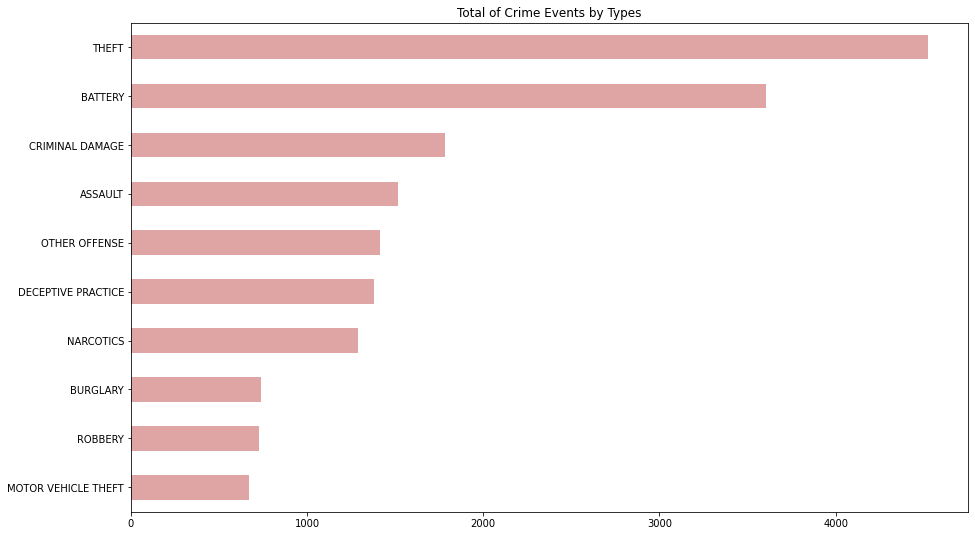

In [22]:
#bar chart top crimes
df['Primary Type'].value_counts().iloc[:10].sort_values().plot(kind="barh", color = '#DEA5A4', title = 'Total of Crime Events by Types', figsize=(15,9))

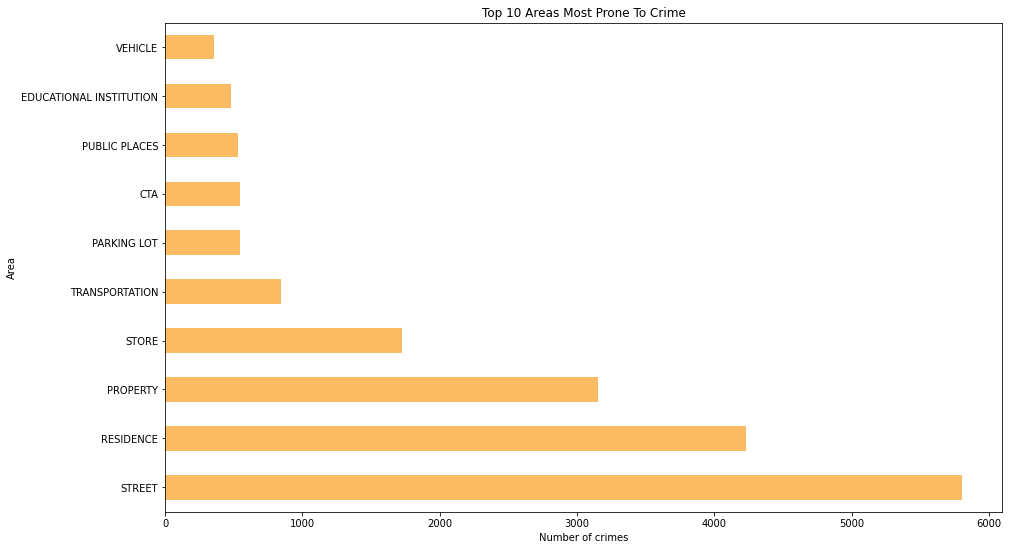

In [23]:
df['Crime_Area'].value_counts().nlargest(10).plot(kind='barh', figsize=(15,9), color = '#FBBB62')
plt.title("Top 10 Areas Most Prone To Crime")
plt.ylabel("Area")
plt.xlabel("Number of crimes");

In [24]:
df["Street_Name"].value_counts().iloc[100:150]

RHODES AVE         50
JEFFERY BLVD       49
LARAMIE AVE        49
SACRAMENTO AVE     49
JUSTINE ST         49
MAPLEWOOD AVE      49
ARMITAGE AVE       49
KEELER AVE         49
ADDISON ST         49
DIVERSEY AVE       48
VINCENNES AVE      48
FAIRFIELD AVE      48
HERMITAGE AVE      48
CLAREMONT AVE      47
ELSTON AVE         47
OGDEN AVE          47
KILDARE AVE        47
WILSON AVE         46
CARPENTER ST       46
THROOP ST          46
ELLIS AVE          46
LAVERGNE AVE       46
LOWE AVE           46
BISHOP ST          45
AVERS AVE          45
INGLESIDE AVE      45
DREXEL AVE         44
OAKLEY AVE         44
ARTESIAN AVE       44
KILBOURN AVE       43
CHRISTIANA AVE     43
LOCKWOOD AVE       43
ADA ST             42
MARQUETTE RD       42
KIMBALL AVE        42
EXCHANGE AVE       42
HONORE ST          42
MARYLAND AVE       41
RIDGEWAY AVE       41
MAYPOLE AVE        41
ERIE ST            41
KENMORE AVE        41
WHIPPLE ST         41
26TH ST            41
COMMERCIAL AVE     41
82ND ST   

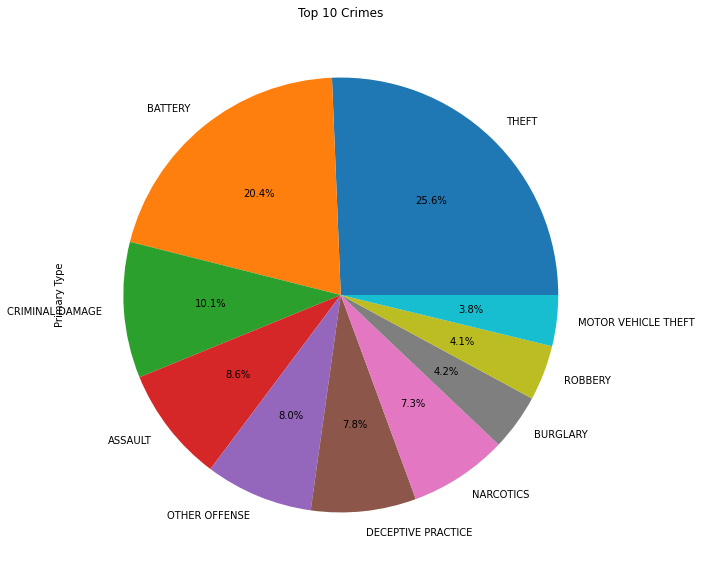

In [25]:
df['Primary Type'].value_counts().iloc[:10].plot.pie(title="Top 10 Crimes",y='MATH',figsize=(10,10), fontsize=10, autopct='%1.1f%%')

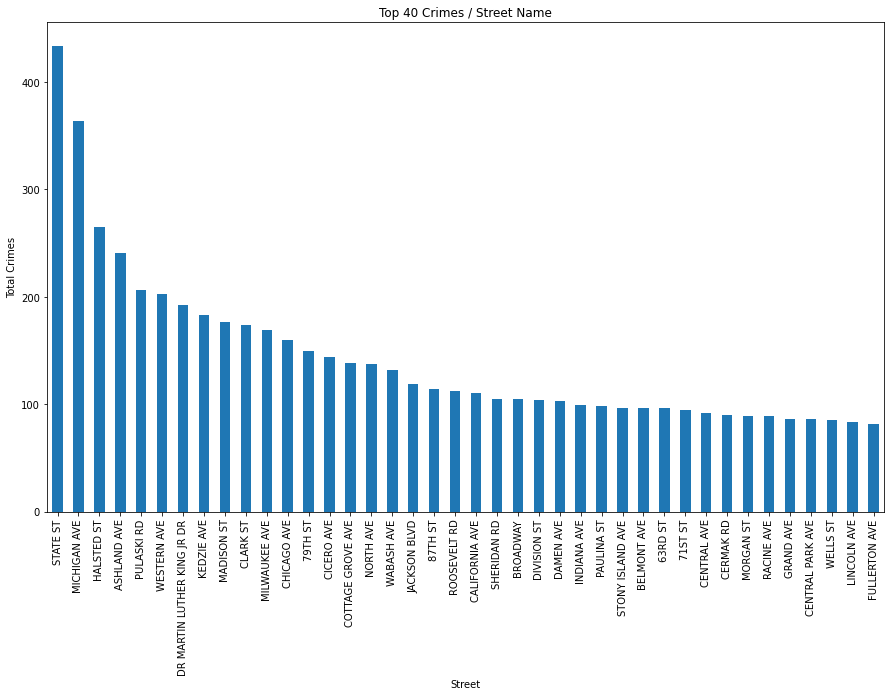

In [26]:
df.Street_Name.value_counts().nlargest(40).plot(kind='bar', figsize=(15,9))
plt.title("Top 40 Crimes / Street Name")
plt.ylabel("Total Crimes")
plt.xlabel("Street");

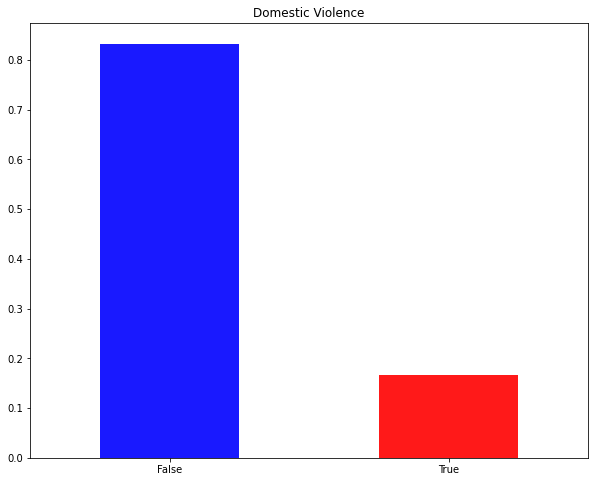

In [27]:
#check Domestic Violence Cases

fig = plt.figure(figsize = (10,8))
df['Domestic'].value_counts(normalize = True).plot(kind='bar', color= ['blue','red'], alpha = 0.9, rot=0)
plt.title('Domestic Violence')
plt.show()

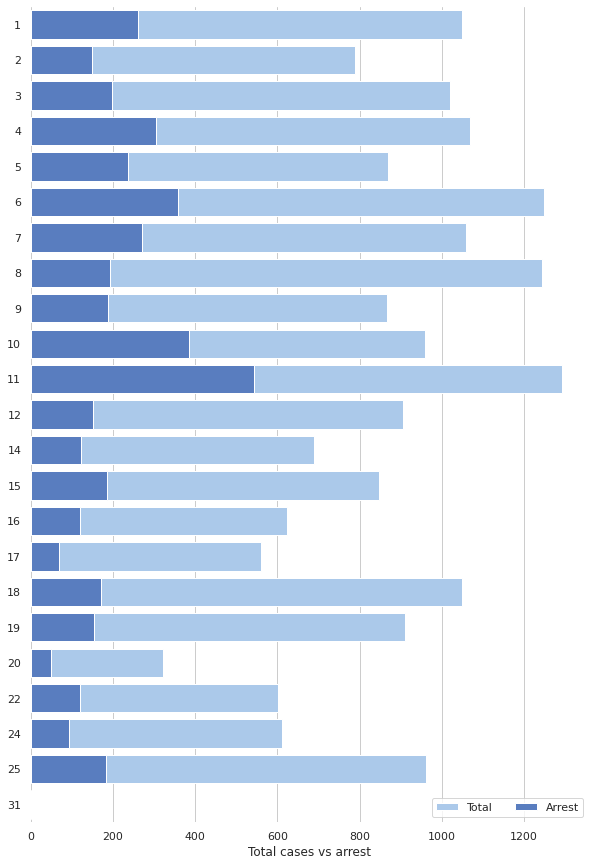

In [28]:
district_list = []

for i in range(0,df.shape[0]):
    district = df.iloc[i].District
    arrest = df.iloc[i].Arrest
    get_index = -1
    
    for j in range(0, len(district_list)):
        if (district_list[j][0] == district):
            get_index = j
            if arrest:
                district_list[j][1]+=1
            else:
                district_list[j][2]+=1
    
    if get_index == -1:
        if arrest:
            district_list.append([district, 1, 0])
        else:
            district_list.append([district, 0, 1])


get_district = pd.DataFrame(columns=['district','arrest','not_arrest'], data=district_list) 
get_district['Total'] = get_district.apply(lambda x: x.arrest+x.not_arrest, axis=1)

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Load the example car crash dataset

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="district", data=get_district,
            label="Total", color="b", orient='h')

sns.set_color_codes("muted")
sns.barplot(x="arrest", y="district", data=get_district,
            label="Arrest", color="b", orient='h')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Total cases vs arrest")
sns.despine(left=True, bottom=True)

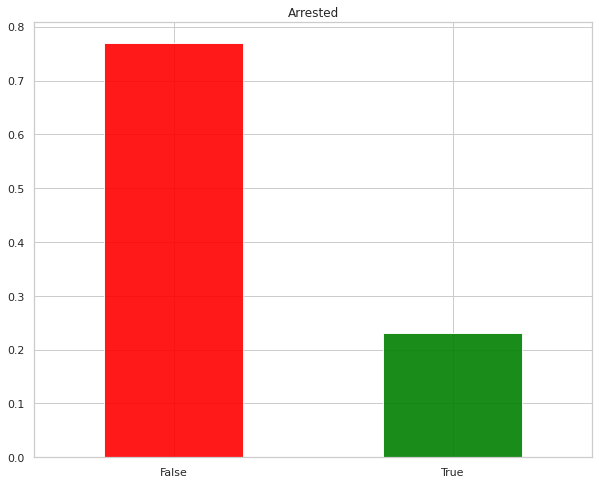

In [29]:
#check Arrested Cases

fig = plt.figure(figsize = (10,8))
df['Arrest'].value_counts(normalize = True).plot(kind='bar', color= ['red','green'], alpha = 0.9, rot=0)
plt.title('Arrested')
plt.show()

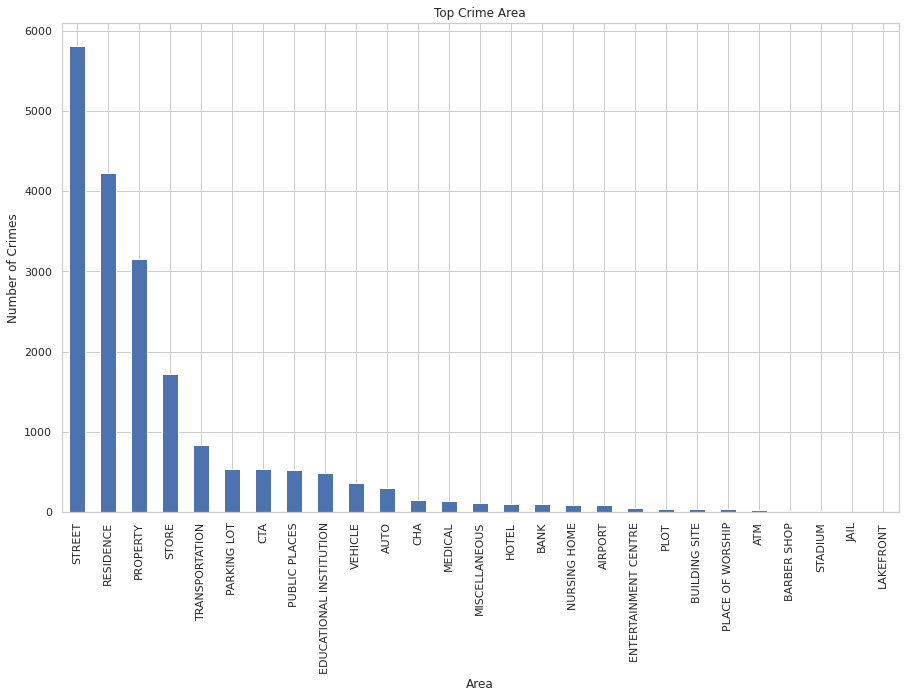

In [30]:
df.Crime_Area.value_counts().nlargest(40).plot(kind='bar', figsize=(15,9))
plt.title("Top Crime Area")
plt.ylabel("Number of Crimes");
plt.xlabel("Area");

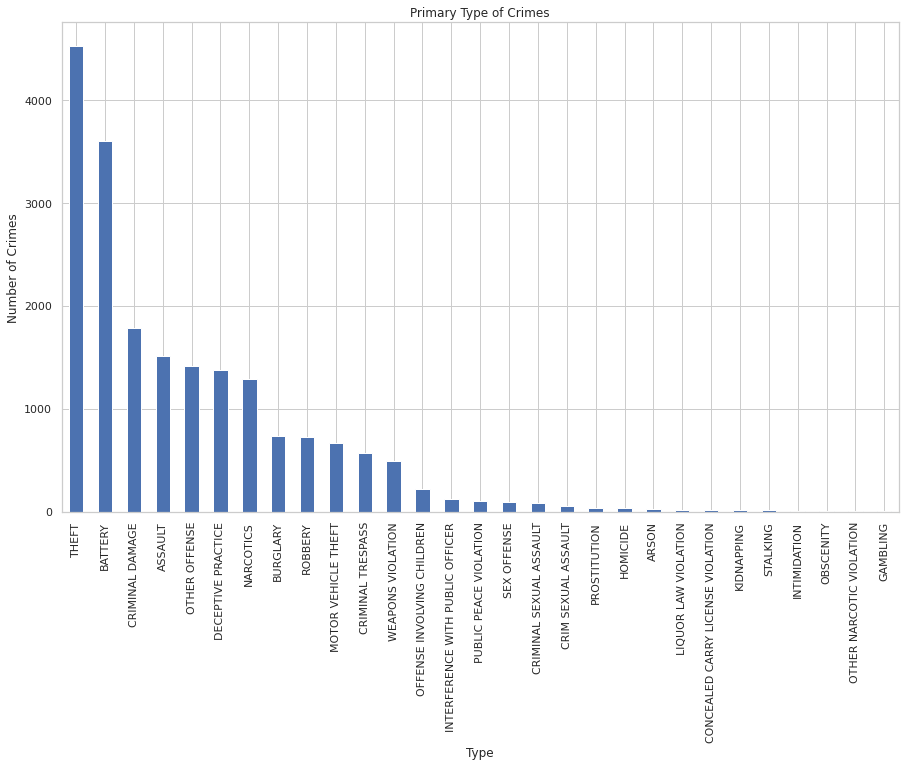

In [31]:
df['Primary Type'].value_counts().nlargest(40).plot(kind='bar', figsize=(15,9))
plt.title("Primary Type of Crimes")
plt.ylabel("Number of Crimes");
plt.xlabel("Type");

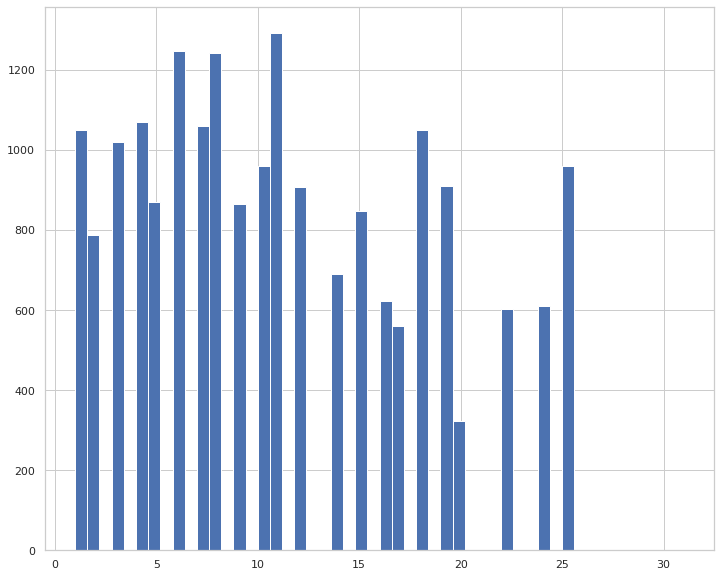

In [32]:
#District Numbers

df['District'].hist(bins=50, figsize=(12,10))

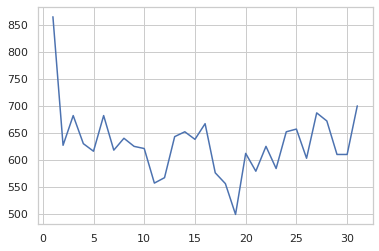

In [33]:
fig, ax = plt.subplots()
ax.plot(df.groupby('day').agg({'day':'count'}))

In [34]:
df.head()

,ID,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,Latitude,Longitude,Location,day,time,Street_Name,Arrest_New,Domestic_New,Crime_Type,Crime_Area
0,12016034,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1434,14,...,41.915306,-87.686639,"(41.915306069, -87.686639247)",1,00:00:00,WINNEBAGO AVE,0,0,9,PROPERTY
1,12220321,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,413,4,...,41.728192,-87.600985,"(41.728192429, -87.600985433)",1,00:00:00,DREXEL AVE,0,1,19,RESIDENCE
2,12013828,044XX S LAVERGNE AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,814,8,...,41.812274,-87.748177,"(41.81227369, -87.748176594)",1,00:00:00,LAVERGNE AVE,0,0,7,PROPERTY
3,12019692,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1922,19,...,41.940222,-87.669039,"(41.940221932, -87.669039008)",1,00:00:00,LINCOLN AVE,0,0,9,PROPERTY
4,12036792,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,831,8,...,41.762067,-87.699077,"(41.762066981, -87.699077348)",1,00:00:00,WHIPPLE ST,0,0,9,RESIDENCE


# **MODEL CONSTRUCTION**


In [ ]:
#categorical data to numeric
df['Street_Name'] = df['Street_Name'].astype('category')
df['Crime_Area'] = df['Crime_Area'].astype('category')
df["CrimeArea_New"]=df["Crime_Area"].cat.codes
df["StreetName_New"] = df["Street_Name"].cat.codes

NameError: ignored

In [ ]:
#unneccesary columns have been dropped
df = df.drop(['ID','IUCR','Arrest','Domestic','Block','Description','FBI Code','X Coordinate','Y Coordinate','Updated On','Location','time','Street_Name','Crime_Area'],axis=1)

NameError: ignored

In [ ]:
# encode Primary Type column to be numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Primary Type']=le.fit_transform(df['Primary Type'])

In [ ]:
# encode Location Description column to be numerical
df['Location Description']=le.fit_transform(df['Location Description'])

In [ ]:
df.dtypes

In [ ]:
# partioning independent and dependent data

X=df.drop('Arrest_New',axis=1)
y=df['Arrest_New']

In [ ]:
# check if any column are having constant variance

from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0.0)
vt.fit_transform(X)
vt.get_support()

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlGn)
plt.show()

In [ ]:
# check if any column are having correlation coefficient value of more than 0.9

def correlation_check(df,val):
    corr_matrix=df.corr()
    features=set()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>0.9:
                features.add(corr_matrix.columns[i])
    return features

In [ ]:
# more than 0.9 correlation coefficient check

columns=correlation_check(X,0.9)
columns

In [ ]:
# remove 'Crime Type' and 'District' column as it is highly correlated with other column

X.drop(columns,axis=1,inplace=True)

In [ ]:
X.shape

In [ ]:
# Scale
from sklearn import preprocessing
X = preprocessing.scale(X)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_norm=ss.fit_transform(X)

In [ ]:
X_norm #what is the purpose of this ??

In [ ]:
# cross validation

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

In [ ]:
# train and test row number

y_train.shape,y_test.shape

# **RANDOM FOREST** - Faris Zulfiqar TP050312

In [ ]:
#importing Model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Definig model and fitting to training data
rfreg = RandomForestClassifier(n_estimators = 10, random_state=0)

rfreg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting y value
y_predict_rfr = rfreg.predict((X_test))


In [ ]:

# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print("==== BEFORE TUNING ====\n")
print(f'Train Accuracy -      : {rfreg.score(X_train,y_train):.6f}')
print('Test Accuracy Score   : ' + str(accuracy_score(y_test,y_predict_rfr)))
print('Precision Score       : ' + str(precision_score(y_test,y_predict_rfr)))
print('Recall Score          : ' + str(recall_score(y_test,y_predict_rfr)))
print('F1 Score              : ' + str(f1_score(y_test,y_predict_rfr)))

# Random forest Classifier Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print('\nConfusion Matrix : \n' + str(confusion_matrix(y_test,y_predict_rfr)))

==== BEFORE TUNING ====

Train Accuracy -      : 0.982418
Test Accuracy Score   : 0.8532344668882639
Precision Score       : 0.7954144620811288
Recall Score          : 0.4961496149614962
F1 Score              : 0.6111111111111112

Confusion Matrix : 
[[2886  116]
 [ 458  451]]


In [ ]:
#Classification report for Random Forest model before tuning
print(classification_report(y_test, y_predict_rfr))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3002
           1       0.80      0.50      0.61       909

    accuracy                           0.85      3911
   macro avg       0.83      0.73      0.76      3911
weighted avg       0.85      0.85      0.84      3911



In [ ]:
print(f'Train Accuracy - : {rfreg.score(X_train,y_train):.6f}')
print(f'Test Accuracy - : {rfreg.score(X_test,y_test):.6f}')

Train Accuracy - : 0.982418
Test Accuracy - : 0.853234


In [ ]:
#Declaring parameters individually
from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10 )]
max_features = ['auto', 'sqrt']
max_depth = [2, 4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True , False]

In [ ]:
# Putting parameters into a grid
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap,
              

              }

print(param_grid)
random_grid = param_grid


{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
#loading Random Forest Model
rfreg2 = RandomForestClassifier()


In [ ]:
#Generating GridSearchCV instance 
rf_grid = GridSearchCV(estimator= rfreg2, param_grid= random_grid, cv = 3, verbose = 2, n_jobs=4)

In [ ]:
#Fitting training model to Random Forest model using GridSearcgCV
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   29.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
#Best parameters
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10}

In [ ]:
print(f'Train Accuracy - : {rf_grid.score(X_train,y_train):.6f}')
print(f'Test Accuracy - : {rf_grid.score(X_test,y_test):.6f}')

Train Accuracy - : 0.792660
Test Accuracy - : 0.788034


In [ ]:
y_predict_acc = rf_grid.predict(X_test)

In [ ]:
# Model Evaluation metrics after model tuning
print("==== AFTER TUNING ====\n")
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print(f'Train Accuracy -      : {rf_grid.score(X_train,y_train):.6f}')
print('Test Accuracy Score   : ' + str(accuracy_score(y_test,y_predict_acc)))
print('Precision Score       : ' + str(precision_score(y_test,y_predict_acc)))
print('Recall Score          : ' + str(recall_score(y_test,y_predict_acc)))
print('F1 Score              : ' + str(f1_score(y_test,y_predict_acc)))

#Random Forest Classifier Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print('\nConfusion Matrix : \n' + str(confusion_matrix(y_test,y_predict_acc)))

==== AFTER TUNING ====

Train Accuracy -      : 0.792660
Test Accuracy Score   : 0.7880337509588341
Precision Score       : 0.75
Recall Score          : 0.132013201320132
F1 Score              : 0.22450888681010286

Confusion Matrix : 
[[2962   40]
 [ 789  120]]


In [ ]:
print(classification_report(y_test, y_predict_acc))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3002
           1       0.75      0.13      0.22       909

    accuracy                           0.79      3911
   macro avg       0.77      0.56      0.55      3911
weighted avg       0.78      0.79      0.73      3911



# **LOGISTIC REGRESSION** - Aisha Fakhar Iqbal TP050393

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,mean_squared_error,classification_report, confusion_matrix, r2_score

In [ ]:
#Initial Logistic Regression 
logreg = LogisticRegression()

#Training Logistic Regression Model  
logfit = logreg.fit(X_train, y_train)

#Predicting on X_test (predicted y value)
y_pred = logreg.predict(X_test)

In [ ]:
#Generating Classification Report for logistic regression model 
print('**** BEFORE TUNING *****')
print('************************')
print(" ")

print(classification_report(y_test,y_pred))

#f1-score shows that 1 is not being predicted by the model - suggests imbalance in Data. 


**** BEFORE TUNING *****
************************
 
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3002
           1       0.00      0.00      0.00       909

    accuracy                           0.77      3911
   macro avg       0.38      0.50      0.43      3911
weighted avg       0.59      0.77      0.67      3911



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


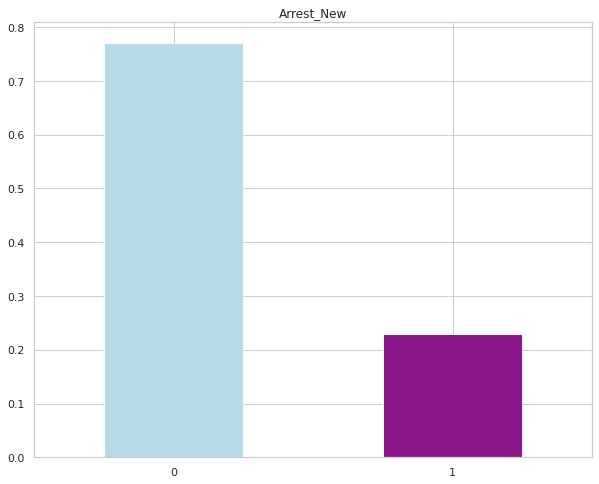

In [ ]:
fig = plt.figure(figsize = (10,8))
y_train.value_counts(normalize = True).plot(kind='bar', color= ['lightblue','purple'], alpha = 0.9, rot=0)
plt.title('Arrest_New')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, '(0) Not Arrested / (1) Arrested'),
 Text(0.5, 1.0, 'Oversampled Arrest_New')]

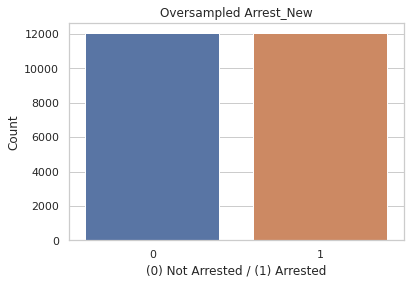

In [ ]:
#Over Sampeling done using SMOTE Technique - for building a better prediction model 
from imblearn.over_sampling import SMOTE

# Seed used by the random number generator set to 0 - random gen needs a number to start generating numbers from
sm = SMOTE(random_state = 0) 

#Oversampeling training data only - test set to be used for predictions
X_train_os, y_train_os = sm.fit_sample(X_train, y_train)

#ploting oversampled trained data to see no imbalance
sns.countplot(y_train_os).set(title='Oversampled Arrest_New', xlabel='(0) Not Arrested / (1) Arrested', ylabel='Count')


In [ ]:
# LOGISTIC REGRESSION - After over sampeling

#creating object for Logistic Regression with default parameters 
os_logreg = LogisticRegression()

# Training Logistic Regression with oversampled train data
logfit = logreg.fit(X_train_os, y_train_os)

#viewing default parameters of os_logreg
logfit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predicting on X_test (predicted y value)
y_pred_os = logreg.predict(X_test)

In [ ]:
# Generating classification report on oversampled data 
print('**** AFTER SAMPLING & BEFORE TUNING *****')
print('******************************************')
print(" ")

print(classification_report(y_test,y_pred_os))

# The report shows improvement in predicting 1 as compared to logistic regression built with imbalanced data 
# Accuracy however is low at 56.2%

**** AFTER SAMPLING & BEFORE TUNING *****
******************************************
 
              precision    recall  f1-score   support

           0       0.81      0.56      0.66      3002
           1       0.28      0.58      0.38       909

    accuracy                           0.56      3911
   macro avg       0.55      0.57      0.52      3911
weighted avg       0.69      0.56      0.60      3911



In [ ]:
# Displaying Accuracy, Precision, Recall and F1 Score in more detail 
print('**** AFTER SAMPLING & BEFORE TUNING *****')
print('******************************************')
print(" ")

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_os)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_os)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_os)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_os)))

**** AFTER SAMPLING & BEFORE TUNING *****
******************************************
 
Accuracy Score : 0.5620046024034774
Precision Score : 0.2827027027027027
Recall Score : 0.5753575357535754
F1 Score : 0.37912287060529176


Text(0.5, 12.5, 'Predicted Values')

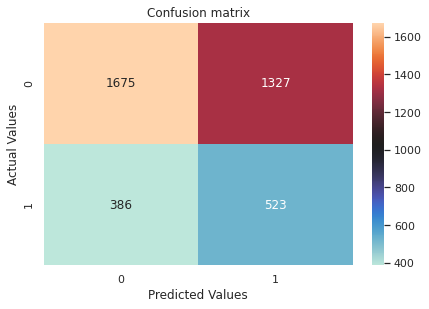

In [ ]:
# Generating Confusion Matrix 
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_os)
confusion_matrix
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap='icefire' ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')


In [ ]:
TN = confusion_matrix[0,0]
TP = confusion_matrix[1,1]
FN = confusion_matrix[1,0]
FP = confusion_matrix[0,1]

In [ ]:
print('**** AFTER SAMPLING & BEFORE TUNING *****')
print('******************************************')
print(" ")
print ('Model Accuracy: ', (TP+TN)/(TP+TN+FP+FN))
print ('Misclassification Rate:', 1-(TP+TN)/(TP+TN+FP+FN))
print ('True Positive Rate:', TP/(TP+FN))
print ('True Negative Rate:', TN/(TN+FP))
print ('Positive Predicted Value:', TP/(TP+FP))
print ('Negative Predicted Value:', TN/(TN+FN))


**** AFTER SAMPLING & BEFORE TUNING *****
******************************************
 
Model Accuracy:  0.5620046024034774
Misclassification Rate: 0.4379953975965226
True Positive Rate: 0.5753575357535754
True Negative Rate: 0.5579613590939374
Positive Predicted Value: 0.2827027027027027
Negative Predicted Value: 0.8127122755943716


In [ ]:
#Evaluation Matrix 
print('**** AFTER SAMPLING & BEFORE TUNING *****')
print('******************************************')
print(" ")
print ('Model Accuracy: ', (TP+TN)/(TP+TN+FP+FN))
print ('Misclassification Rate:', 1-(TP+TN)/(TP+TN+FP+FN))
print ('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_os)) 
print ('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_os)))
print ('R-Squared: ', metrics.r2_score(y_test, y_pred_os))


**** AFTER SAMPLING & BEFORE TUNING *****
******************************************
 
Model Accuracy:  0.5620046024034774
Misclassification Rate: 0.4379953975965226
Mean Squared Error:  0.4379953975965226
Root Mean Squared Error:  0.6618122071981769
R-Squared:  -1.4551080357869224


In [ ]:
## **LOGISTIC REGRESSION - MODEL PARAMETERS AND TUNING** 
# Logistic Regression for tuning 
t_logreg = LogisticRegression() 

In [ ]:
# Parameters selected for Grid Search to go through and find best ones 
param_grids = [
              {
                  'penalty':['l1','l2'],
                  'C': np.logspace (-4,4,20),
                  'solver':['lbfgs','newton-cg','liblinear', 'sag','saga'],
                  'class_weight':[{0:0.6, 1:0.4}],
              }
]


In [ ]:
# Applying GridSearchCV for best parameters 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(t_logreg, param_grid = param_grids, cv = 3, verbose = True, n_jobs = -1)

In [ ]:
# Training model on best parameters 
best_grid = grid.fit(X_train_os,y_train_os)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   20.5s finished


In [ ]:
# Best Parameters that Grid Search CV has selected to be applied to Logistic Regression 
# for tuning 
best_grid.best_estimator_

LogisticRegression(C=0.00026366508987303583, class_weight={0: 0.6, 1: 0.4},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# Applying selected Parameters to Logistic Regression 

t_logreg = LogisticRegression(C=0.00026366508987303583, class_weight={0: 0.6, 1: 0.4},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

fit = t_logreg.fit(X_train_os,y_train_os)

In [ ]:
# Training Logistic Regression with new predicted value of y on tuned model
new_y_pred = t_logreg.predict(X_test)

In [ ]:
#Calculating f1 score, precision and recall 
print('**** AFTER TUNING *****')
print('***********************')
print(" ")

print(classification_report(y_test,new_y_pred))

**** AFTER TUNING *****
***********************
 
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      3002
           1       0.36      0.15      0.21       909

    accuracy                           0.74      3911
   macro avg       0.57      0.53      0.53      3911
weighted avg       0.68      0.74      0.70      3911



In [ ]:
print('**** AFTER TUNING *****')
print('***********************')
print(" ")
acc = metrics.accuracy_score(y_test, new_y_pred)
print("Accuracy:", acc)
print("Precision:",metrics.precision_score(y_test, new_y_pred))
print("Recall:",metrics.recall_score(y_test, new_y_pred))
print("Misclassification Score", 1 - acc)

**** AFTER TUNING *****
***********************
 
Accuracy: 0.7386857581181283
Precision: 0.3554987212276215
Recall: 0.15291529152915292
Misclassification Score 0.2613142418818717


Text(0.5, 12.5, 'Predicted Values')

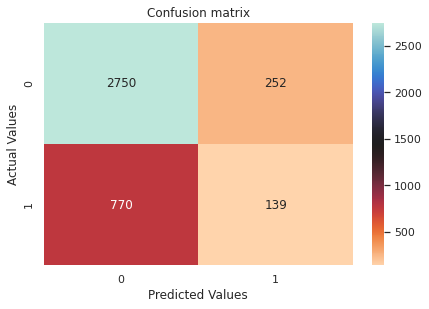

In [ ]:
# Confusion Matrix on tuned Log Reg Model 
new_confusion_matrix = metrics.confusion_matrix(y_test, new_y_pred)
new_confusion_matrix
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(new_confusion_matrix), annot=True, cmap='icefire_r' ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [ ]:
TN_t=new_confusion_matrix[1][1]
TP_t=new_confusion_matrix[0][0]
FN_t=new_confusion_matrix[1][0]
FP_t=new_confusion_matrix[0][1]

In [ ]:
print('**** AFTER TUNING *****')
print('***********************')
print(" ")
print ('Model Accuracy: ', (TP_t+TN_t)/(TP_t+TN_t+FP_t+FN_t))
print ('Misclassification Rate:', 1-(TP_t+TN_t)/(TP_t+TN_t+FP_t+FN_t))
print ('True Positive Rate:', TP_t/(TP_t+FN_t))
print ('True Negative Rate:', TN_t/(TN_t+FP_t))
print ('Positive Predicted Value:', TP_t/(TP_t+FP_t))
print ('Negative Predicted Value:', TN_t/(TN_t+FN_t))


**** AFTER TUNING *****
***********************
 
Model Accuracy:  0.7386857581181283
Misclassification Rate: 0.2613142418818717
True Positive Rate: 0.78125
True Negative Rate: 0.3554987212276215
Positive Predicted Value: 0.916055962691539
Negative Predicted Value: 0.15291529152915292


In [ ]:
# Evaluation Matrix chosen 
print('**** AFTER TUNING *****')
print('***********************')
print(" ")
print ('Model Accuracy: ', (TP_t+TN_t)/(TP_t+TN_t+FP_t+FN_t))
print ('Misclassification Rate:', 1-(TP_t+TN_t)/(TP_t+TN_t+FP_t+FN_t))
print ('Mean Squared Error: ', metrics.mean_squared_error(y_test, new_y_pred)) 
print ('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, new_y_pred)))
print ('R-Squared: ', metrics.r2_score(y_test, new_y_pred))

**** AFTER TUNING *****
***********************
 
Model Accuracy:  0.7386857581181283
Misclassification Rate: 0.2613142418818717
Mean Squared Error:  0.26131424188187163
Root Mean Squared Error:  0.5111890471067153
R-Squared:  -0.464752138105216


# **DECISION TREES** - Basmah Zahid TP050310


## Here the default decision tree is built


In [ ]:
#import class of decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score,precision_score

In [ ]:
#pure tree 
dd = DecisionTreeClassifier()
dd.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Accuracy Score
dd_pred = dd.predict(X_test)
print(classification_report(y_test,dd_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3002
           1       0.60      0.61      0.60       909

    accuracy                           0.81      3911
   macro avg       0.74      0.74      0.74      3911
weighted avg       0.82      0.81      0.81      3911



In [ ]:
print(f'Train Accuracy: {dd.score(X_train,y_train):.6f}')
print(f'Test Accuracy: {dd.score(X_test,y_test):.6f}')

Train Accuracy: 0.999169
Test Accuracy: 0.813858


Text(0.5, 1.0, 'Confusion Matrix')

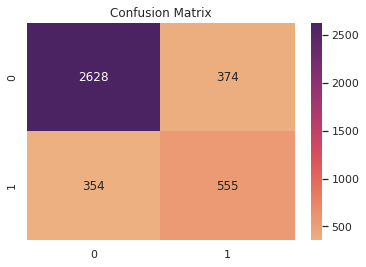

In [ ]:
# confusion matrix heat map
cmatrix =confusion_matrix(y_test,dd_pred) 
sns.heatmap(cmatrix,cmap='flare',annot=True, fmt='.0f')
plt.title("Confusion Matrix")


## **Decision Tree** - FINAL

**TASKS**
1.   Oversampling is done to balance dataset
2.   Model tuning with GridSearch and KFold
3.   Evaluation using confusion matrix, classfication table and auc-roc chart







In [ ]:
#importing all the libraries that will be used below
from sklearn.tree import DecisionTreeClassifier,tree
#oversampling class
from imblearn.over_sampling import SMOTE
#counter class to see distribution of 0 and 1 in dataset
from collections import Counter
#class for model tuning and hyper parameters
from sklearn.model_selection import GridSearchCV,KFold
#metrics for evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score,roc_curve, auc, roc_auc_score
#for graphs
from matplotlib import pyplot as plt
import itertools

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbo

In [ ]:
#this shows an imbalance in numbers of 0 and 1 so we will do over sampling
print(sorted(Counter(df['Arrest_New']).items()))

[(0, 15045), (1, 4507)]


In [ ]:
#transforming dataset to more balanced dataset
smote = SMOTE(random_state = 2)
X_train_oversample, y_train_oversample = smote.fit_sample(X_train, y_train.ravel())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


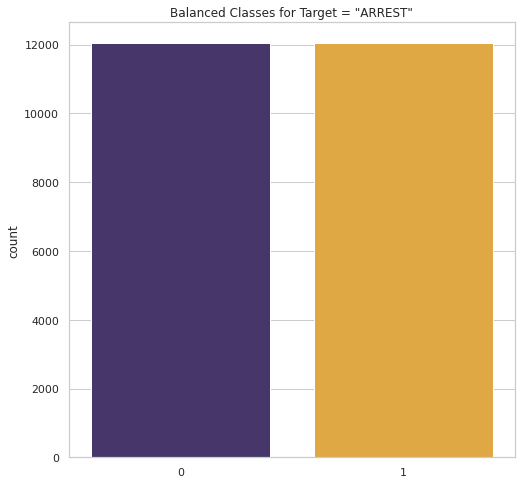

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(y_train_oversample,palette=['#432d71',"#FAAE2B"])
plt.title('Balanced Classes for Target = "ARREST"')
plt.show()

In [ ]:
#decision tree with default paramters - NO TUNING + Oversampled Data
dc = DecisionTreeClassifier()
#fitting decision tree with over sampled train data
dc.fit(X_train_oversample,y_train_oversample)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(f'Train Accuracy: {dc.score(X_train_oversample,y_train_oversample):.6f}')
print(f'Test Accuracy: {dc.score(X_test,y_test):.6f}')

Train Accuracy: 0.999460
Test Accuracy: 0.801585


In [ ]:
#Model Evaluation before any tuning is performed
#classification table, confusion matrix
#prediction test
y_pred=dc.predict(X_test)

#confusion matrix calculator for other metrics
conm =confusion_matrix(y_test,y_pred)
TP = conm[0,0] # true positive 
TN = conm[1,1] # true negatives
FP = conm[0,1] # false positives
FN = conm[1,0] # false negatives
Total = TP+TN+FP+FN

#all metrics before tuning
Specificity = (TN)/(TN+FP)
Sensitivity = (TP)/(TP+FN)
Misclassification = 1-(accuracy_score(y_test,y_pred))
print('Specificity           :',Specificity)
print('Sensitivity           :',Sensitivity)
print('Misclassification Rate:',Misclassification)
print('Accuracy              :', accuracy_score(y_test,y_pred))
print('Precision             :', precision_score(y_test,y_pred)) #positive predicted value
print('Recall                :', recall_score(y_test,y_pred)) #true positive rate
print('F1-Score              :', f1_score(y_test,y_pred))

#classification report
print(classification_report(y_test,y_pred))

Specificity           : 0.5667001003009027
Sensitivity           : 0.8819492107069321
Misclassification Rate: 0.19841472769112756
Accuracy              : 0.8015852723088724
Precision             : 0.5667001003009027
Recall                : 0.6215621562156216
F1-Score              : 0.5928646379853094
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3002
           1       0.57      0.62      0.59       909

    accuracy                           0.80      3911
   macro avg       0.72      0.74      0.73      3911
weighted avg       0.81      0.80      0.80      3911



Text(0.5, 1.0, 'Confusion Matrix Before Tuning')

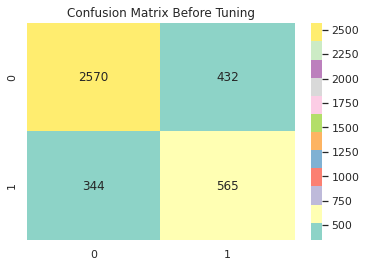

In [ ]:
# confusion matrix heat map
cmatrix =confusion_matrix(y_test,y_pred) 
sns.heatmap(cmatrix,cmap='Set3',annot=True, fmt='.0f')
plt.title("Confusion Matrix Before Tuning")

## **After Oversampling**
- K-Fold CV performed for Grid Search
- Meta/Hyper parameters are selected
- Grid Search is performed

In [ ]:
#K-fold cross validation
kf = KFold(n_splits =5, random_state =47)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
#dictionary for hyper parameters and model tuning
param_dist= {
   "criterion":["gini", "entropy"],
   "max_depth": [1,2,3,4,5,6,7,8],
   "min_samples_leaf":[2,5,10,25,50,75,100],
   "min_samples_split":[2,5,10,25,50,75,100],
     }

In [ ]:
#by using n_jobs = -1, we telling to use all processer to finish fast
#cv = kfold validation, will do 5 kfold validation, best value for cv is 3/5/10
grid = GridSearchCV(estimator = dc ,param_grid = param_dist,cv = kf, verbose = 2, n_jobs=-1)

In [ ]:
#fit of model
grid.fit(X_train_oversample,y_train_oversample)

Fitting 5 folds for each of 784 candidates, totalling 3920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 1679 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1962 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3396 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3920 out of 3920 | elapsed:  3.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=47, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_

In [ ]:
#result of grid search with the ranking of best parameter for modelling
score_dc = pd.DataFrame(grid.cv_results_)
score_dc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031046,0.004572,0.001807,0.000330,gini,1,2,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.600457,0.619473,0.612414,0.656010,0.000000,0.497671,0.249525,687
1,0.024069,0.001610,0.001436,0.000096,gini,1,2,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.600457,0.619473,0.612414,0.656010,0.000000,0.497671,0.249525,687
2,0.025404,0.003906,0.001455,0.000113,gini,1,2,10,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.600457,0.619473,0.612414,0.656010,0.000000,0.497671,0.249525,687
3,0.024292,0.001580,0.001434,0.000079,gini,1,2,25,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.600457,0.619473,0.612414,0.656010,0.000000,0.497671,0.249525,687
4,0.025430,0.002188,0.001429,0.000091,gini,1,2,50,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.600457,0.619473,0.612414,0.656010,0.000000,0.497671,0.249525,687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.204527,0.015115,0.001702,0.000040,entropy,8,100,10,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.772105,0.759601,0.758148,0.786382,0.685074,0.752262,0.035102,155
780,0.200879,0.013471,0.001711,0.000049,entropy,8,100,25,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.772105,0.759601,0.758148,0.786382,0.685074,0.752262,0.035102,155
781,0.206182,0.019919,0.001733,0.000082,entropy,8,100,50,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.772105,0.759601,0.758148,0.786382,0.685074,0.752262,0.035102,155
782,0.200519,0.016076,0.001760,0.000109,entropy,8,100,75,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.772105,0.759601,0.758148,0.786382,0.685074,0.752262,0.035102,155


In [ ]:
mm = score_dc.sort_values("rank_test_score")
mm.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
361,0.144694,0.013002,0.001724,0.000058,gini,8,10,50,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.818389,0.808595,0.769359,0.815653,0.754827,0.793364,0.026140,1
358,0.145222,0.012976,0.001776,0.000067,gini,8,10,5,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.817974,0.809010,0.769151,0.814615,0.754619,0.793074,0.026035,2
363,0.144901,0.006179,0.002768,0.002009,gini,8,10,100,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.819635,0.807764,0.771019,0.814200,0.752751,0.793074,0.026382,3
359,0.141333,0.009706,0.001705,0.000062,gini,8,10,10,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.817974,0.809010,0.769151,0.814200,0.754619,0.792991,0.025967,4
362,0.141213,0.009210,0.001717,0.000047,gini,8,10,75,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.820257,0.807972,0.770604,0.813785,0.752128,0.792949,0.026725,5


In [ ]:
#overfitting has been reduced, better accuracy
print(f'Train Accuracy: {grid.score(X_train_oversample,y_train_oversample):.6f}') #train value after tuning
print(f'Test Accuracy: {grid.score(X_test,y_test):.6f}')#test value after tuning

Train Accuracy: 0.835174
Test Accuracy: 0.851956


In [ ]:
grid.best_params_ #best parameters for the model

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 10,
 'min_samples_split': 50}


## **Model Tuning Results & Model Evaluation**
- build new model with grid search results and perform evaluation
- Classification chart (inc. Misclassification Rate, Sensitivity and Specificity)
- AUC-ROC Chart
-Confusion Matrix

In [ ]:
new_dc = DecisionTreeClassifier(criterion = 'gini',max_depth=8,min_samples_leaf=10,min_samples_split=50)
new_dc.fit(X_train_oversample,y_train_oversample)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
new_dc_pred = new_dc.predict(X_test)

**Classification Chart**

In [ ]:
#confusion Matrix calcualtor
cfm =confusion_matrix(y_test,new_dc_pred)
TP = cfm[0,0] # true positive 
TN = cfm[1,1] # true negatives
FP = cfm[0,1] # false positives
FN = cfm[1,0] # false negatives
Total = TP+TN+FP+FN

#all metrics after tuning and oversampling

Specificity = (TN)/(TN+FP)
Sensitivity = (TP)/(TP+FN)
Misclassification = 1-(accuracy_score(y_test,new_dc_pred))
print('Specificity           :',Specificity)
print('Sensitivity           :',Sensitivity)
print('Misclassification Rate:',Misclassification)
print('Model Results After Tuning')
print('Accuracy              :', accuracy_score(y_test,new_dc_pred))
print('Precision             :', precision_score(y_test,new_dc_pred))
print('Recall                :', recall_score(y_test,new_dc_pred))
print('F1-Score              :', f1_score(y_test,new_dc_pred))
print(classification_report(y_test,new_dc_pred))

Specificity           : 0.7285129604365621
Sensitivity           : 0.8820012586532411
Misclassification Rate: 0.14676553311173612
Model Results After Tuning
Accuracy              : 0.8532344668882639
Precision             : 0.7285129604365621
Recall                : 0.5874587458745875
F1-Score              : 0.6504263093788064
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      3002
           1       0.73      0.59      0.65       909

    accuracy                           0.85      3911
   macro avg       0.81      0.76      0.78      3911
weighted avg       0.85      0.85      0.85      3911



**Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix After Tuning')

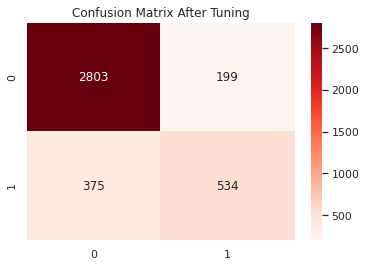

In [ ]:
#confusion matrix heat map
conm =confusion_matrix(y_test,new_dc_pred)
sns.heatmap(conm,cmap='Reds',annot=True, fmt='.0f')
plt.title('Confusion Matrix After Tuning')

**AUC - ROC Chart**

In [ ]:
#rechecking accuracy scores
print(f'Train Accuracy: {new_dc.score(X_train_oversample,y_train_oversample):.6f}') #train value after tuning
print(f'Test Accuracy: {new_dc.score(X_test,y_test):.6f}')#test value after tuning

Train Accuracy: 0.835174
Test Accuracy: 0.853234


In [ ]:
#prediction probabilities
x_probs = [0 for _ in range(len(y_test))] 
new_dc_probs = new_dc.predict_proba(X_test)
dc_probs = dc.predict_proba(X_test)

In [ ]:
new_dc_probs = new_dc_probs[:,1] #Keeping positive prob
dc_probs = dc_probs[:,1]

In [ ]:
#computing auroc and roc curve value
x_auc = roc_auc_score(y_test,x_probs)
new_dc_auc = roc_auc_score(y_test,new_dc_probs)
dc_auc = roc_auc_score(y_test,dc_probs)

In [ ]:
#AUC-ROC valuce
print ('Random prediction AUROC = %.3f' %(x_auc))
print ('Decision Tree prediction AUROC = %.3f'%(new_dc_auc))
print ('Decision Tree prediction AUROC - no tuning = %.3f'%(dc_auc))

Random prediction AUROC = 0.500
Decision Tree prediction AUROC = 0.845
Decision Tree prediction AUROC - no tuning = 0.739


In [ ]:
#roc curve values
x_fpr,x_tpr,_ = roc_curve (y_test,x_probs)
new_dc_fpr,new_dc_tpr,_ = roc_curve(y_test,new_dc_probs)
dc_fpr,dc_tpr,_ = roc_curve(y_test,dc_probs)

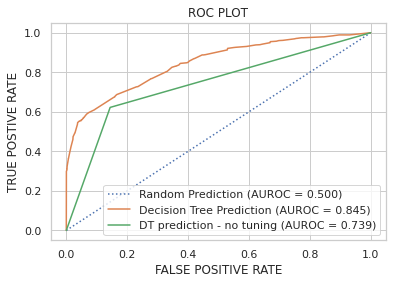

In [ ]:
#chart for roc curve 
import matplotlib.pyplot as plt

#plotting roc curve
plt.plot(x_fpr,x_tpr, linestyle = ':', label = 'Random Prediction (AUROC = %0.3f)' %x_auc)
plt.plot(new_dc_fpr,new_dc_tpr, linestyle = 'solid', label = 'Decision Tree Prediction (AUROC = %0.3f)' %new_dc_auc)
plt.plot(dc_fpr,dc_tpr, linestyle = 'solid', label = 'DT prediction - no tuning (AUROC = %0.3f)' %dc_auc)

#title
plt.title ('ROC PLOT')
#axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSTIVE RATE')
#show legend
plt.legend()
#show plot
plt.show()


#compares perforamnce of different learning models however it can be used to 

In [ ]:
print('Decision Tree (Tuned) %.3f' % new_dc_auc)

Decision Tree (Tuned) 0.845


# **SUPPORT VECTOR MACHINE**  - Justin Louis Halim TP051944


In [ ]:
# initially apply support vector classifier with rbf kernel
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
yhat=svc.predict(X_test)

In [ ]:
# initial SVM accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
accuracySVC = accuracy_score(y_test,yhat)
accuracySVC

In [ ]:
# confusion matrix heat map
sns.heatmap(confusion_matrix(y_test,yhat),cmap='Greens',annot=True, fmt='.0f')

In [ ]:
# classification report
print(classification_report(y_test,yhat))

In [ ]:
# SVM kernels 
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernel
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernel
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernel
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernel
        return SVC(kernel='linear', gamma="auto")

In [ ]:
for i in range(4):

# Train a SVC model using different kernal
    svclassifier = getClassifier(i)

# Making prediction
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)

# Print Model Evaluation Classification Report
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

In [ ]:
# import grid search to choose meta parameter
from sklearn.model_selection import GridSearchCV

In [ ]:
# grid search parameters
param_grid = {'C': [0.1,1, 10, 100], 'gamma': ['auto'],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
# hyperparameter tuning with Grid Search
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,n_jobs=4)
grid.fit(X_train,y_train)

In [ ]:
# best class and parameters of the model
print(grid.best_estimator_)

In [ ]:
# model evaluation classification report
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

In [ ]:
# confusion matrix heat map
sns.heatmap(confusion_matrix(y_test,grid_predictions),cmap='Greens',annot=True, fmt='.0f')

In [ ]:
# model accuracy score
accuracySVC2 = accuracy_score(y_test,grid_predictions)
accuracySVC2

In [ ]:
# confusion matrix calculator
cm = confusion_matrix (y_test,grid_predictions)

TN=cm[1][1]
TP=cm[0][0]
FN=cm[1][0]
FP=cm[0][1]

In [ ]:
# rates and scores evaluation
print ('Accuracy Score = ', (TP+TN)/(TP+TN+FP+FN))
print ('Misclassification Score = ', 1-(TP+TN)/(TP+TN+FP+FN))
print ('Sensitivity Rate = ', TP/(TP+FN))
print ('Specificity Rate = ', TN/(TN+FP))
print ('Positive Predicted Value = ', TP/(TP+FP))
print ('Negative Predicted Value = ', TN/(TN+FN))
print ('Positive Likelihood Ratio = ', ((TP/(TP+FN))/(1-(TN/(TN+FP)))))
print ('Negative Likelihood Ratio = ', ((1-(TP/(TP+FN)))/(TN/(TN+FP))))

In [ ]:
# MAE, MSE, RMSE, R2 evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grid_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grid_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))
print('R square:',r2_score(y_test, grid_predictions))